# UCLAI: Unsupervised Learning - Coursework

---




## Part I. Eigenfaces

In this part, we will perform PCA for face recognition. We will use a dataset of faces from sklearn, consisting of 1288 samples of 50x57 images.

In [ ]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4, color=False)
n_samples, h, w = lfw_people.images.shape

n_samples, h, w

(1288, 50, 37)

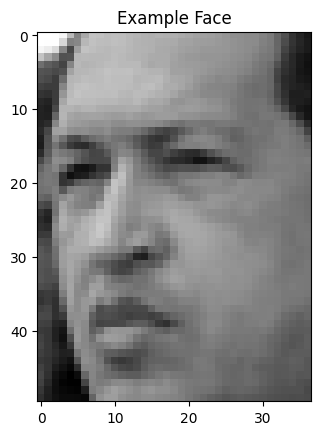

In [ ]:
# Get the dimensions of the images
n_samples, h, w = lfw_people.images.shape

# Plot the first face
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray)
plt.show()

As a first task, calculate and plot the mean face.

In [ ]:
X = lfw_people.data

# TODO
# 1. Calculate the mean face
# 2. Plot the mean face

For the first task, plot the eigenspectrum of the empircal covariance.

In [ ]:
# TODO
# 1. Subtract the mean face from each face image to center the data
# 2. Calculate the covariance matrix of the centered data (hint: use np.cov with rowvar=False)
# 3. Calculate the eigenvalues and eigenvectors of the empirical covariance matrix
# 4. Sort eigenvalues and corresponding eigenvectors in descending order
# 5. Plot the eigenspectrum of the empirical covariance matrix

**Question**: Does PCA make sense with that eigenspectrum? Why or why not?

Now, let's select the top 150 eigenfaces, and project the centered data onto these eigenfaces.

In [ ]:
# TODO
# 1. Select the top 150 eigenfaces (eigenvectors)
# 2. Plot the first 10 eigenfaces

Now, let's reconstruct some of the original faces using the selected eigenfaces. This process involves projecting the centered face data onto the eigenface subspace and then transforming it back to the original image space.

In [ ]:
# TODO
# 1. Project the centered data onto the eigenface subspace
# 2. Multiply the projected data by the eigenfaces and add back the mean face
# 3. Plot ~5 original and reconstructed faces for comparison

**Question**: We picked the first 150 eigenfaces. Instead, try with 10, 20, 50, 100, 500, 1000. What do you notice?

## Part II. Drunk k-means

We will perform k-means on a dataset of wines. First, let's explore the dataset.

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.preprocessing import StandardScaler

wine = load_wine()

df_data = pd.DataFrame(wine.data, columns=wine.feature_names)
df_target = pd.DataFrame(wine.target, columns=['target'])

display(df_data.head())
display(df_data.describe())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_data)
df_scaled_data = pd.DataFrame(scaled_data, columns=wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Now, implement k-means on `df_scaled_data` assuming 3 clusters.


In [ ]:
# TODO: Implement k-means. Return the predicted label for each point.

Using PCA, project the data into the first 2 principal components. Use the projection to plot the predicted labels from k-means.


In [ ]:
# TODO: Using PCA, visualize the predicted labels in 2 dimensions.

**Question**: Are you satisfied of the convergence of your k-means algorithm? How many iterations did it take for it to converge? Try running it again with different cluster numbers. What do you observe?

## Part III (Optional)

Find the maximum likelihood estimate $\mu_{\text{ML}}$ for $x \sim L(\mu, b)$. $L(\mu, b)$ is the Laplace distribution. Assume $b$ is known.

Is the result coherent with minimizing an L1 loss?